# Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from pyod.models.knn import KNN 
from sklearn.ensemble import IsolationForest

In [2]:
def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    db = []

    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

    return(np.max(db) / n_cluster)

In [5]:
bn32 = pd.read_csv("botnet32.csv")

In [6]:
bt = pd.read_csv("benign_traffic.csv")

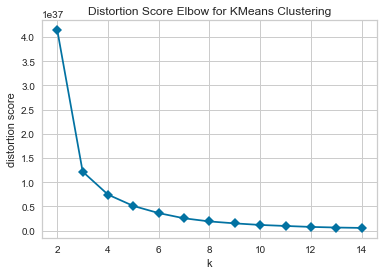

In [80]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False, locate_elbow=False)
visualizer.fit(bt)        
visualizer.show()  

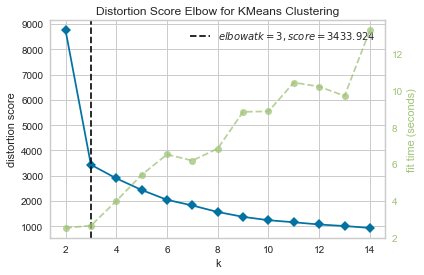

In [79]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X_normalized)        
visualizer.show()  

In [ ]:
df = pd.DataFrame(columns = ['Clusters', 'Davies Bouldin Index', 'Silhouette Score'])

In [49]:
k = KMeans(n_clusters=3)
k1 = k.fit(bt)

In [7]:
for i in range(2, 20):
    k = KMeans(n_clusters=i)
    k1 = k.fit(bt)
    print("Clusters =",i,"Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_), "Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

Clusters = 2 Davies Bouldin Score = 0.19918819544263483 Silhouette Score = 0.9950133766085033
Clusters = 3 Davies Bouldin Score = 0.37427750599838844 Silhouette Score = 0.9923626919566279
Clusters = 4 Davies Bouldin Score = 0.540960442864652 Silhouette Score = 0.9911074777831487
Clusters = 5 Davies Bouldin Score = 0.5948502392007946 Silhouette Score = 0.9903590383876943
Clusters = 6 Davies Bouldin Score = 0.5103463501566267 Silhouette Score = 0.9894302503370925
Clusters = 7 Davies Bouldin Score = 0.5181388855746174 Silhouette Score = 0.989445431523915
Clusters = 8 Davies Bouldin Score = 0.5138235019198903 Silhouette Score = 0.9887251329717661
Clusters = 9 Davies Bouldin Score = 0.49597745049306624 Silhouette Score = 0.988651841485051
Clusters = 10 Davies Bouldin Score = 0.5063137308804148 Silhouette Score = 0.9883912550933664
Clusters = 11 Davies Bouldin Score = 0.5319041920079186 Silhouette Score = 0.9881237413017152
Clusters = 12 Davies Bouldin Score = 0.537146521499963 Silhouette Sc

In [ ]:
m = MeanShift()
m11 = m.fit(bt)
mDBScore = davies_bouldin_score(bt, labels = k1.labels_)
mSScore = silhouette_score(bt, labels = k1.labels_)
print("Mean Shift Clustering = ",", Davies Bouldin Score =",mDBScore, "Silhouette Score =",mSScore)

In [19]:
k = DBSCAN().fit(bt)
k1 = k.fit(bt)
print("DBSCAN: Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_),"Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

DBSCAN: Davies Bouldin Score = 2.0946009982180667 Silhouette Score = -0.9765735689839646


In [48]:
pd.DataFrame(k1.labels_)[0].value_counts()

-1    49537
 0        6
 1        5
Name: 0, dtype: int64

In [ ]:
k = DBSCAN().fit(bt)
k1 = k.fit(bt)
print("DBSCAN: Davies Bouldin Score =",davies_bouldin_score(bt, labels = k1.labels_),"Silhouette Score =",silhouette_score(bt, labels = k1.labels_))

In [54]:
a = pd.read_csv("capture20110810.binetflow.2format")

In [55]:
b = a.dropna()
dummyList = ['Proto', 'State', 'Label']
modify = ['SrcAddr', 'DstAddr', 'StartTime', 'LastTime']

In [58]:
c = pd.get_dummies(b, columns = dummyList, drop_first = True)

In [59]:
d = c.drop(columns=modify)

In [92]:
gmm = GaussianMixture(n_components = 5) 

In [93]:
X_normalized = preprocessing.normalize(bt, norm='l1')

In [94]:
gmm.fit(X_normalized) 
gmmlabels = gmm.predict(X_normalized) 
gmmDBScore = davies_bouldin_score(X_normalized, labels = gmmlabels)
gmmSScore = silhouette_score(X_normalized, labels = gmmlabels)

In [95]:
print("GMM : Davies Bouldin Score =",gmmDBScore, "Silhouette Score =",gmmSScore)

GMM : Davies Bouldin Score = 1.1763767845197908 Silhouette Score = 0.5441764344778236


In [96]:
valuesGMM, countsGMM = np.unique(gmmlabels, return_counts=True)
print("Values = ", valuesGMM, ", Counts = ", countsGMM)

Values =  [0 1 2 3 4] , Counts =  [25981  5969 10039   197  7362]


In [97]:
a = []
for i in range(len(bt)):
    if isoForPred[i] == -1:
        a.append(gmmlabels[i])
aAnomaly, aAnomalyCounts = np.unique(a, return_counts=True)
print("Values = ", aAnomaly, ", Counts = ", aAnomalyCounts)

Values =  [0 1 2 3 4] , Counts =  [ 517  872 2727  197  642]


In [98]:
a = []
for i in range(len(bt)):
    if y_pred[i] == 1:
        a.append(gmmlabels[i])
aAnomaly, aAnomalyCounts = np.unique(a, return_counts=True)
print("Values = ", aAnomaly, ", Counts = ", aAnomalyCounts)

Values =  [0 1 2 3 4] , Counts =  [ 144 3864  214  185  386]


In [65]:
valuesGMM, countsGMM = np.unique(isoForPred, return_counts=True)
print("Values = ", valuesGMM, ", Counts = ", countsGMM)

Values =  [-1  1] , Counts =  [ 4955 44593]


In [55]:
a = []
for i in range(len(bt)):
    if y_pred[i] == 1:
        a.append(gmmlabels[i])
aAnomaly, aAnomalyCounts = np.unique(a, return_counts=True)
print("Values = ", aAnomaly, ", Counts = ", aAnomalyCounts)

Values =  [0 1 2 3 5] , Counts =  [  22   29  293 4333  116]


In [42]:
k = KMeans(n_clusters=5)
k1 = k.fit(bt)
kDBScore = davies_bouldin_score(bt, labels = k1.labels_)
kSScore = silhouette_score(bt, labels = k1.labels_)
print("K-Means : Davies Bouldin Score =",kDBScore, "Silhouette Score =",kSScore)

Clusters = 49547 Davies Bouldin Score = 0.6119865906148739 Silhouette Score = 0.9903549378840737


In [43]:
valuesGMM, countsGMM = np.unique(k1.labels_, return_counts=True)
print("Values = ", valuesGMM, ", Counts = ", countsGMM)

Values =  [0 1 2 3 4] , Counts =  [49127    47   111   239    24]


In [70]:
a = []
for i in range(len(bt)):
    if isoForPred[i] == -1:
        a.append(k1.labels_[i])
aAnomaly, aAnomalyCounts = np.unique(a, return_counts=True)
print("Values = ", aAnomaly, ", Counts = ", aAnomalyCounts)

Values =  [0 1 2 3 4] , Counts =  [4562   47  111  211   24]


In [51]:
outliers_fraction = 0.10
clf = KNN(contamination=outliers_fraction)
clf.fit(bt)
scores_pred = clf.decision_function(bt) * -1
y_pred = clf.predict(bt)

In [52]:
valuesGMM, countsGMM = np.unique(y_pred, return_counts=True)
print("Values = ", valuesGMM, ", Counts = ", countsGMM)

Values =  [0 1] , Counts =  [44755  4793]


In [71]:
a = []
for i in range(len(bt)):
    if y_pred[i] == 1:
        a.append(k1.labels_[i])
aAnomaly, aAnomalyCounts = np.unique(a, return_counts=True)
print("Values = ", aAnomaly, ", Counts = ", aAnomalyCounts)

Values =  [0 1 2 3 4] , Counts =  [4418   47  103  201   24]


In [72]:
aAnomalyCounts.sum()

4793

# Isolation Forest Model

In [18]:
isoFor = IsolationForest(random_state=0).fit(bt)
isoForPred = isoFor.predict(bt)